# 1. Importing Libraries

In [83]:
import pandas as pd
import numpy as np
#for visualizations
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
# modelling
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from matplotlib import pyplot
# Evaluation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc

import warnings

# 2. Loading Dataset

In [84]:
dt=pd.read_csv("D://A_数据挖掘课程作业//Input_Data//heart_failure_clinical_records_dataset.csv")

In [85]:
dt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [86]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [87]:
#Statistical quantitative description of the category features
# 列出所有分类变量的列名
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# 对每个分类变量进行统计描述
for column in categorical_columns:
    # 计算每个类别的计数
    counts = dt[column].value_counts()
    
    # 计算每个类别的频率
    frequencies = dt[column].value_counts(normalize=True)
    
    # 打印结果
    print(f"统计描述 - {column}:")
    print("计数:")
    print(counts)
    print("频率:")
    print(frequencies)
    print()

统计描述 - anaemia:
计数:
0    170
1    129
Name: anaemia, dtype: int64
频率:
0    0.568562
1    0.431438
Name: anaemia, dtype: float64

统计描述 - diabetes:
计数:
0    174
1    125
Name: diabetes, dtype: int64
频率:
0    0.58194
1    0.41806
Name: diabetes, dtype: float64

统计描述 - high_blood_pressure:
计数:
0    194
1    105
Name: high_blood_pressure, dtype: int64
频率:
0    0.648829
1    0.351171
Name: high_blood_pressure, dtype: float64

统计描述 - sex:
计数:
1    194
0    105
Name: sex, dtype: int64
频率:
1    0.648829
0    0.351171
Name: sex, dtype: float64

统计描述 - smoking:
计数:
0    203
1     96
Name: smoking, dtype: int64
频率:
0    0.67893
1    0.32107
Name: smoking, dtype: float64



# 3. Data Preprossing

In [88]:
# renaming few columns
dt.rename(columns={'creatinine_phosphokinase' : 'cpk' ,'DEATH_EVENT':'death','ejection_fraction':'ejf','high_blood_pressure':'hbp','serum_creatinine':'sec','serum_sodium':'ses'}  , inplace=True)
dt.head()

,age,anaemia,cpk,diabetes,ejf,hbp,platelets,sec,ses,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [89]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    float64
 1   anaemia    299 non-null    int64  
 2   cpk        299 non-null    int64  
 3   diabetes   299 non-null    int64  
 4   ejf        299 non-null    int64  
 5   hbp        299 non-null    int64  
 6   platelets  299 non-null    float64
 7   sec        299 non-null    float64
 8   ses        299 non-null    int64  
 9   sex        299 non-null    int64  
 10  smoking    299 non-null    int64  
 11  time       299 non-null    int64  
 12  death      299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [90]:
# converting features to categorical features
dt['anaemia']=dt.anaemia.apply(lambda x:'true' if x==1 else 'false')
dt['hbp']=dt.hbp.apply(lambda x:'true' if x==1 else 'false')
dt['diabetes']=dt.diabetes.apply(lambda x:'true' if x==1 else 'false')
dt['sex']=dt.sex.apply(lambda x:'man' if x==1 else 'woman')
dt['smoking']=dt.smoking.apply(lambda x:'true' if x==1 else 'false')

In [91]:
dt.head()

,age,anaemia,cpk,diabetes,ejf,hbp,platelets,sec,ses,sex,smoking,time,death
0,75.0,false,582,false,20,true,265000.00,1.9,130,man,false,4,1
1,55.0,false,7861,false,38,false,263358.03,1.1,136,man,false,6,1
2,65.0,false,146,false,20,false,162000.00,1.3,129,man,true,7,1
3,50.0,true,111,false,20,false,210000.00,1.9,137,man,false,7,1
4,65.0,true,160,true,20,false,327000.00,2.7,116,woman,false,8,1


In [92]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    float64
 1   anaemia    299 non-null    object 
 2   cpk        299 non-null    int64  
 3   diabetes   299 non-null    object 
 4   ejf        299 non-null    int64  
 5   hbp        299 non-null    object 
 6   platelets  299 non-null    float64
 7   sec        299 non-null    float64
 8   ses        299 non-null    int64  
 9   sex        299 non-null    object 
 10  smoking    299 non-null    object 
 11  time       299 non-null    int64  
 12  death      299 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 30.5+ KB


In [93]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age          0
anaemia      0
cpk          0
diabetes     0
ejf          0
hbp          0
platelets    0
sec          0
ses          0
sex          0
smoking      0
time         0
death        0
dtype: int64

# 4. Exploratory Data Analysis

## Multivariate Analysis

### Plotting bar charts

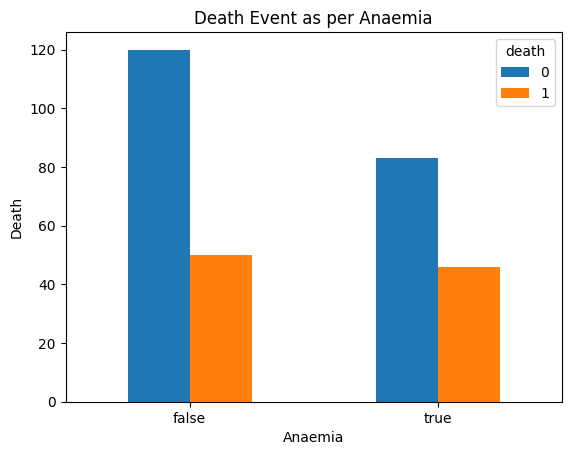

In [94]:
# Analysis of Anaemia and Death_event
pd.crosstab(dt.anaemia ,dt.death).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.xticks(rotation=360)
plt.ylabel('Death')
plt.show()

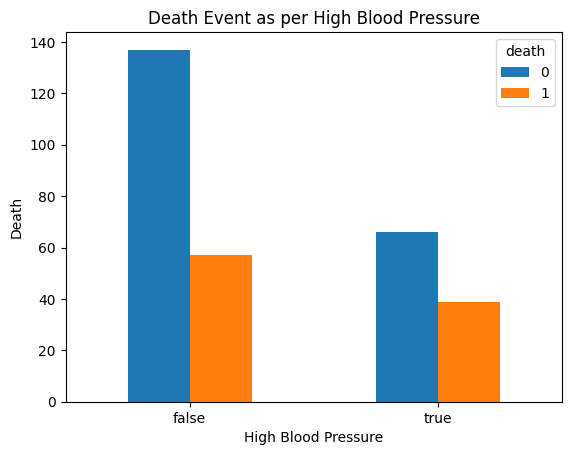

In [95]:
# Analysis of high blood pressure and death_pressure
pd.crosstab(dt.hbp  ,dt.death).plot(kind='bar')
plt.title('Death Event as per High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.xticks(rotation=360)
plt.ylabel('Death')
plt.show()

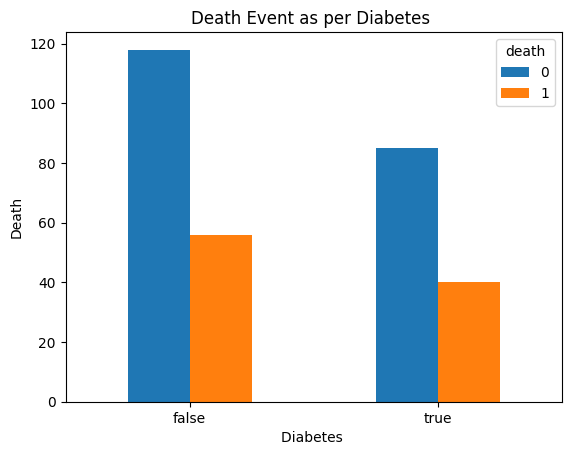

In [96]:
#Analysis of diabetes and death_event
pd.crosstab(dt.diabetes ,dt.death).plot(kind='bar')
plt.title('Death Event as per Diabetes ')
plt.xlabel('Diabetes ')
plt.xticks(rotation=360)
plt.ylabel('Death')
plt.show()

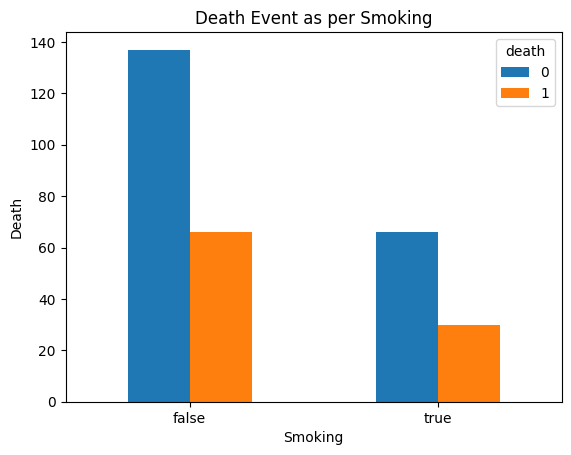

In [97]:
# Analysis of smoking and death_event
pd.crosstab(dt.smoking  ,dt.death).plot(kind='bar')
plt.title('Death Event as per Smoking')
plt.xlabel('Smoking')
plt.xticks(rotation=360)
plt.ylabel('Death')
plt.show()

### **Plot pie chats for category features & death event**

In [98]:
# define subplot
def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)
## histogram with hue
def plot_hist_hue(x, hu, ax, d=dt, multi="stack", kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, hue=hu, kde=kde, multiple=multi, log_scale=log)
# boxplot with one categorical
def plot_boxcat(x, y, ax, d=dt):
    sns.boxplot(data=d, x=x, y=y, ax=ax)

#### anaemia & death

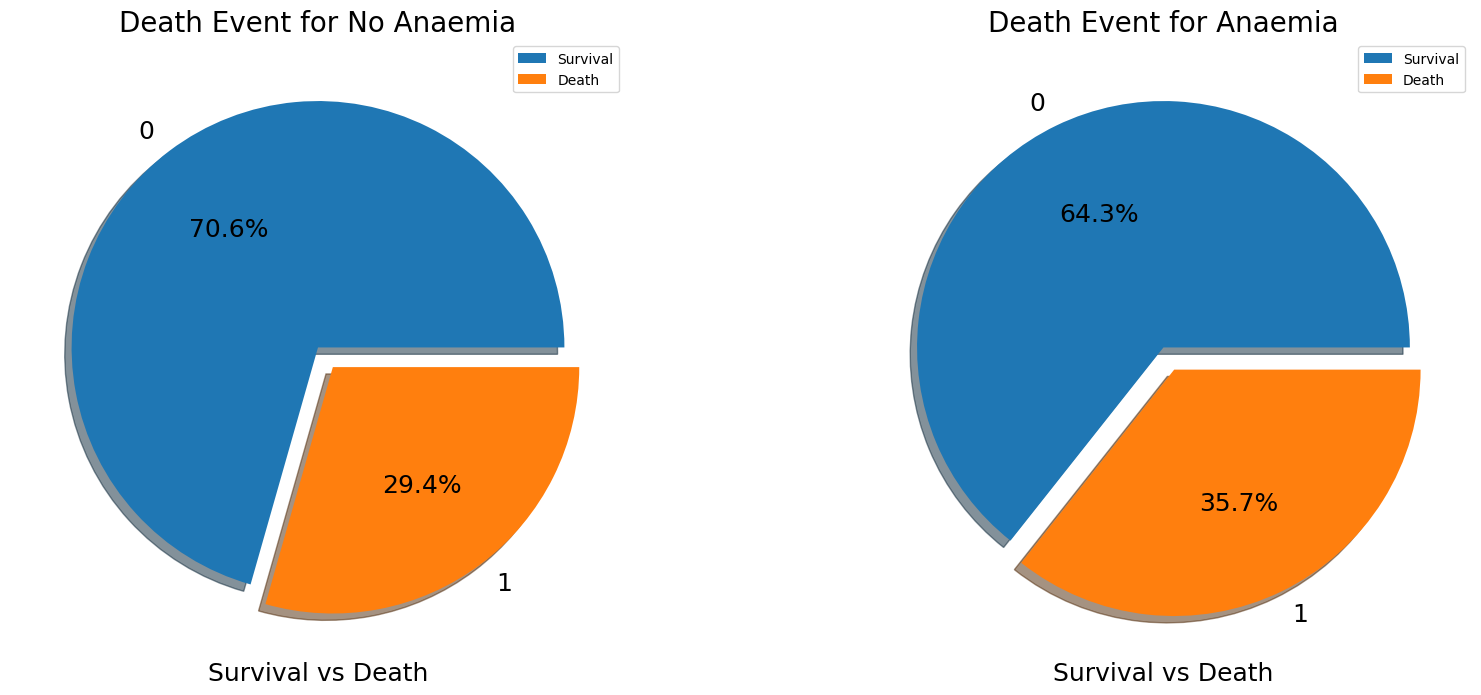

In [99]:
# Make DF for not anaemia & death
dt11 = dt[(dt["anaemia"] == "false") & (dt["death"] == 0)]
dt12 = dt[(dt["anaemia"] == "false") & (dt["death"] == 1)]
dtcomb1 = pd.concat([dt11, dt12])
# make df for anaemia & death_event
dt21=dt[(dt["anaemia"] == "true") & (dt["death"] == 0)]
dt22=dt[(dt["anaemia"] == "true") & (dt["death"] == 1)]
dtcomb2=pd.concat([dt21,dt22])
# plot
fig, ax=subplts(1,2)

dtcomb1["death"].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[0].set_title("Death Event for No Anaemia",fontsize=20)
ax[0].set_ylabel("", fontsize=10)  
ax[0].set_xlabel("Survival vs Death", fontsize=18)  
ax[0].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

dtcomb2["death"].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[1].set_title("Death Event for Anaemia",fontsize=20)
ax[1].set_ylabel("", fontsize=10) 
ax[1].set_xlabel("Survival vs Death", fontsize=18)  
ax[1].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

plt.show()

#### high blood pressure & death

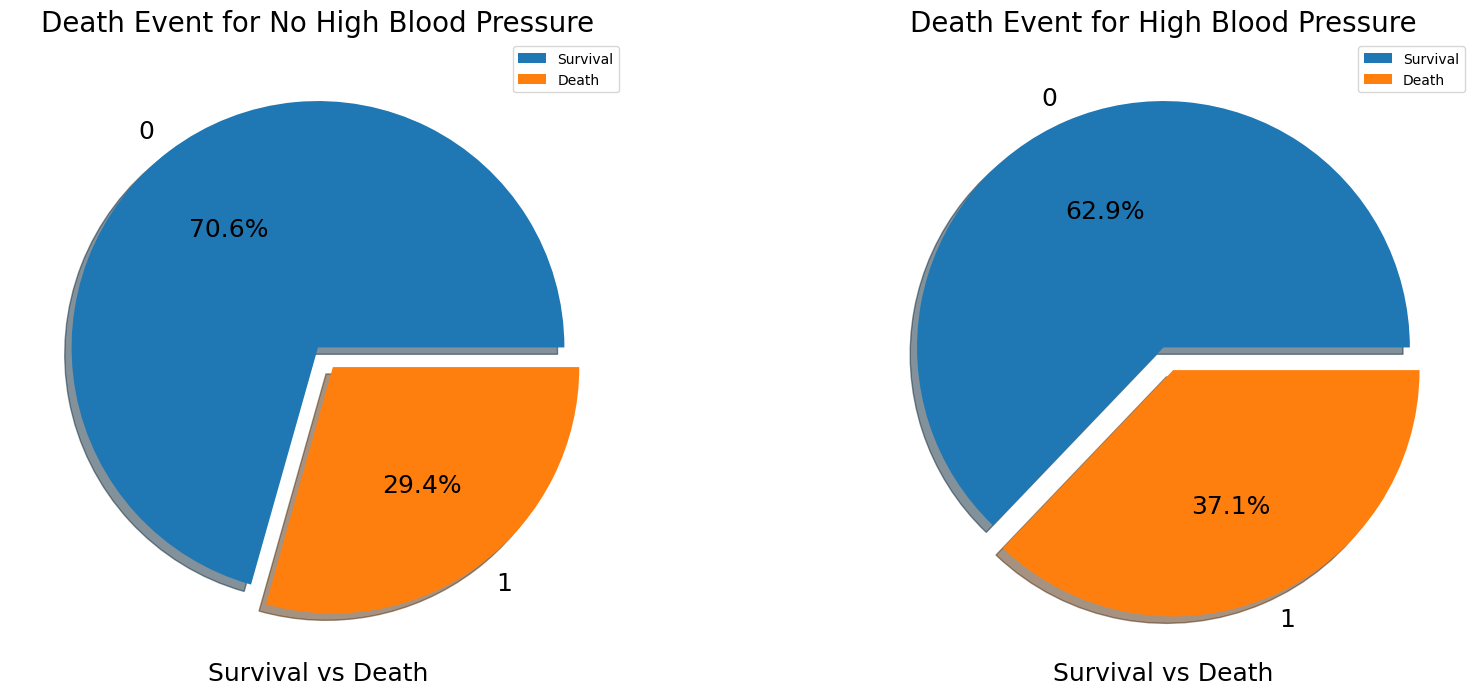

In [100]:
# Make DF for no high blood pressure & death
dt31 = dt[(dt["hbp"] == "false") & (dt["death"] == 0)]
dt32 = dt[(dt["hbp"] == "false") & (dt["death"] == 1)]
dtcomb3 = pd.concat([dt31, dt32])
# make df for high blood pressure & death_event
dt41=dt[(dt["hbp"] == "true") & (dt["death"] == 0)]
dt42=dt[(dt["hbp"] == "true") & (dt["death"] == 1)]
dtcomb4=pd.concat([dt41,dt42])
# plot
fig, ax=subplts(1,2)

dtcomb3["death"].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[0].set_title("Death Event for No High Blood Pressure",fontsize=20)
ax[0].set_ylabel("", fontsize=10)  
ax[0].set_xlabel("Survival vs Death", fontsize=18)  
ax[0].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

dtcomb4["death"].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[1].set_title("Death Event for High Blood Pressure",fontsize=20)
ax[1].set_ylabel("", fontsize=10) 
ax[1].set_xlabel("Survival vs Death", fontsize=18)  
ax[1].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

plt.show()

#### diabetic & death

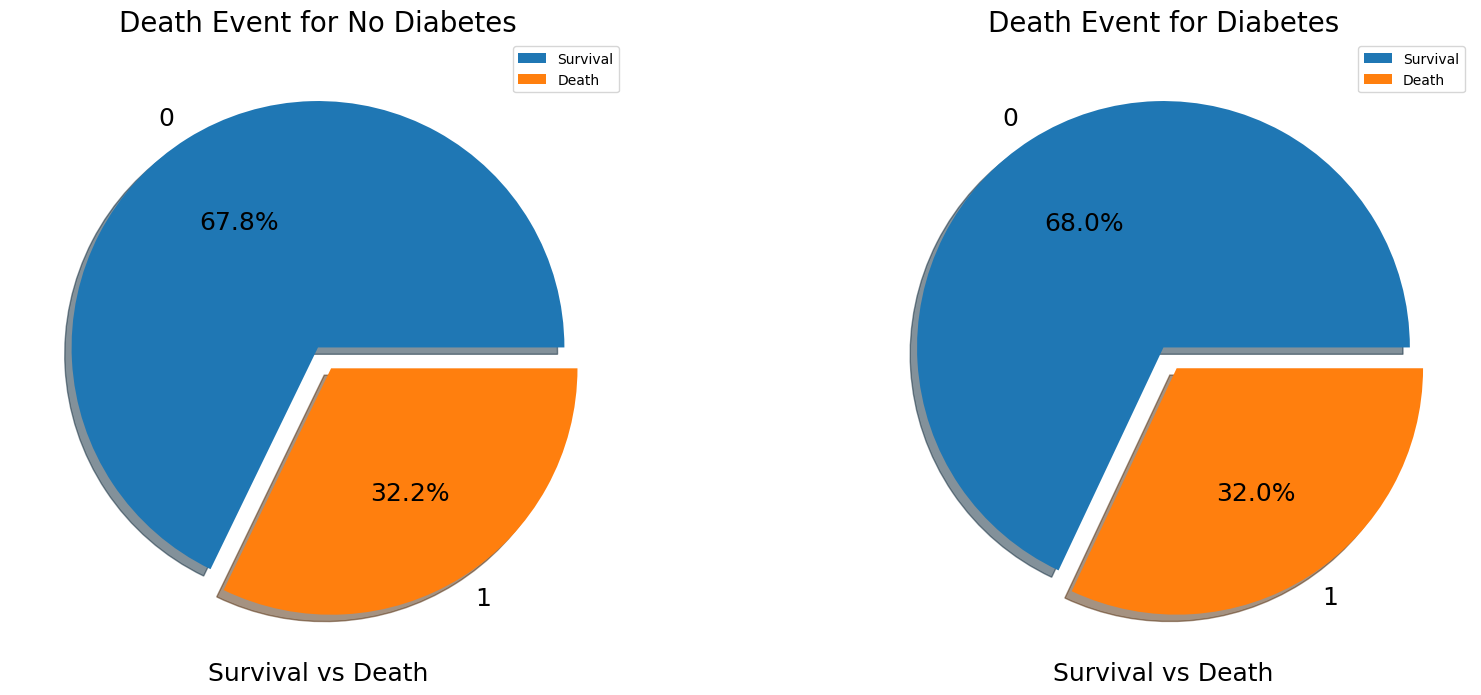

In [101]:
# Make DF for not diabetic & death
dt51 = dt[(dt["diabetes"] == "false") & (dt["death"] == 0)]
dt52 = dt[(dt["diabetes"] == "false") & (dt["death"] == 1)]
dtcomb5 = pd.concat([dt51, dt52])
# make df for diabetes & death_event
dt61=dt[(dt["diabetes"] == "true") & (dt["death"] == 0)]
dt62=dt[(dt["diabetes"] == "true") & (dt["death"] == 1)]
dtcomb6=pd.concat([dt61,dt62])
# plot
fig, ax=subplts(1,2)

dtcomb5["death"].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[0].set_title("Death Event for No Diabetes",fontsize=20)
ax[0].set_ylabel("", fontsize=10)  
ax[0].set_xlabel("Survival vs Death", fontsize=18)  
ax[0].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

dtcomb6["death"].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[1].set_title("Death Event for Diabetes",fontsize=20)
ax[1].set_ylabel("", fontsize=10) 
ax[1].set_xlabel("Survival vs Death", fontsize=18)  
ax[1].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

plt.show()

#### smoking & death

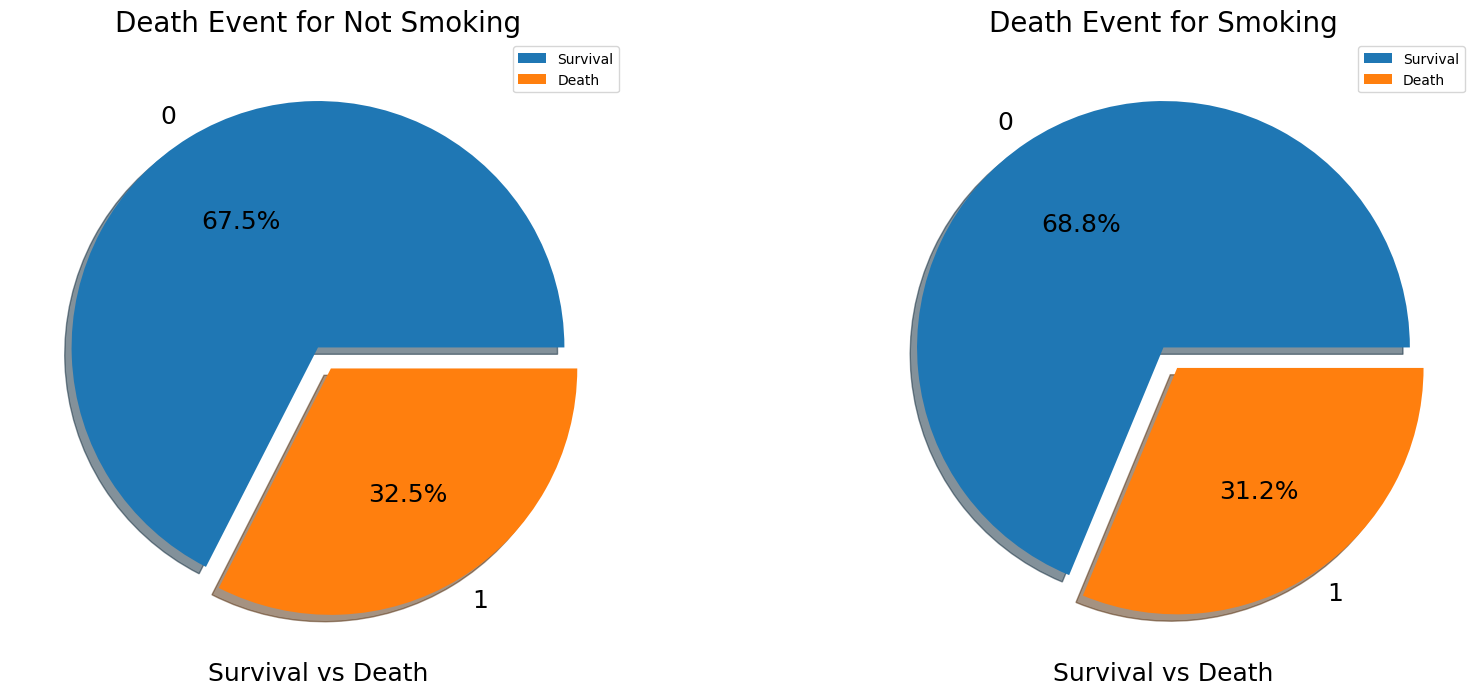

In [102]:
# Make DF for not smoking & death
dt71 = dt[(dt["smoking"] == "false") & (dt["death"] == 0)]
dt72 = dt[(dt["smoking"] == "false") & (dt["death"] == 1)]
dtcomb7 = pd.concat([dt71, dt72])
# make df for smoking & death_event
dt81=dt[(dt["smoking"] == "true") & (dt["death"] == 0)]
dt82=dt[(dt["smoking"] == "true") & (dt["death"] == 1)]
dtcomb8=pd.concat([dt81,dt82])
# plot
fig, ax=subplts(1,2)

dtcomb7["death"].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[0].set_title("Death Event for Not Smoking",fontsize=20)
ax[0].set_ylabel("", fontsize=10)  
ax[0].set_xlabel("Survival vs Death", fontsize=18)  
ax[0].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

dtcomb8["death"].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[1].set_title("Death Event for Smoking",fontsize=20)
ax[1].set_ylabel("", fontsize=10) 
ax[1].set_xlabel("Survival vs Death", fontsize=18)  
ax[1].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

plt.show()

#### sex & death

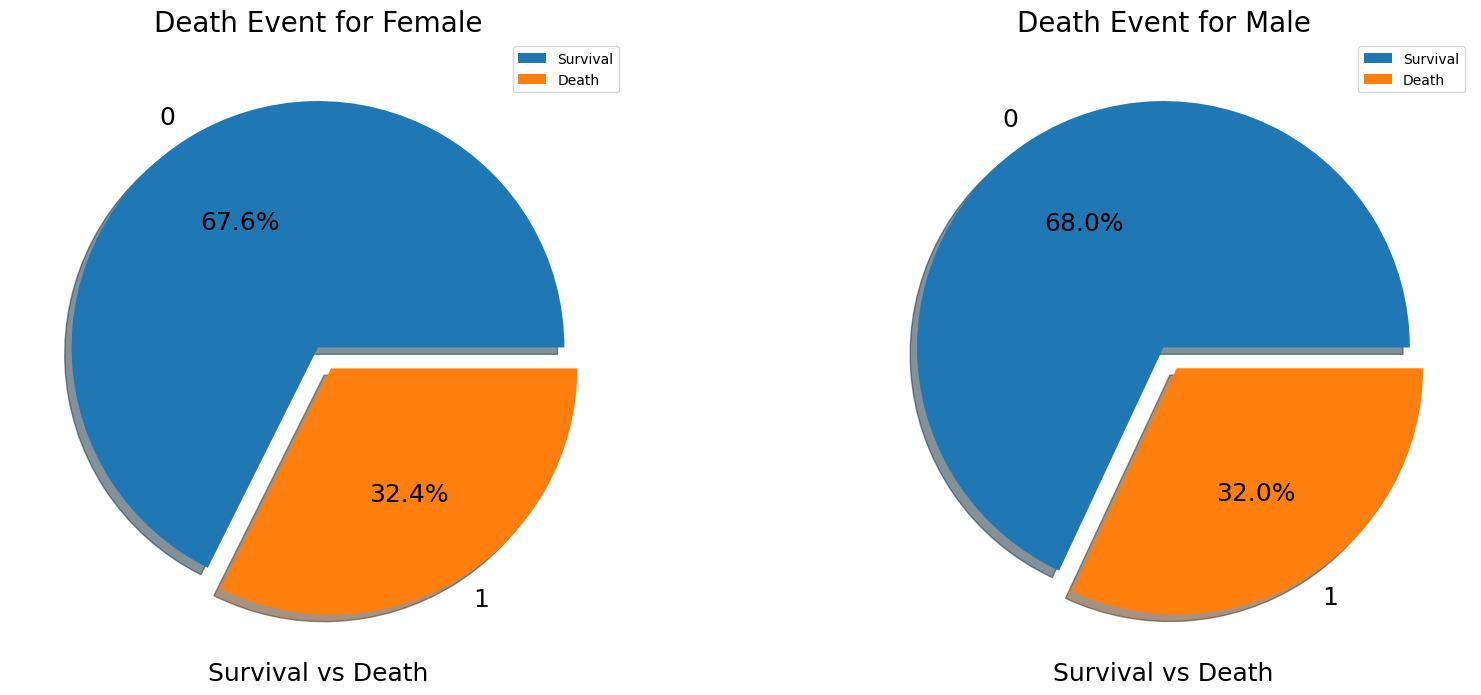

In [103]:
# Make DF for women & death
dt91 = dt[(dt["sex"] == "woman") & (dt["death"] == 0)]
dt92 = dt[(dt["sex"] == "woman") & (dt["death"] == 1)]
dtcomb9 = pd.concat([dt91, dt92])
# make df for man & death_event
dt01=dt[(dt["sex"] == "man") & (dt["death"] == 0)]
dt02=dt[(dt["sex"] == "man") & (dt["death"] == 1)]
dtcomb0=pd.concat([dt01,dt02])
# plot
fig, ax=subplts(1,2)

dtcomb9["death"].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[0].set_title("Death Event for Female",fontsize=20)
ax[0].set_ylabel("", fontsize=10)  
ax[0].set_xlabel("Survival vs Death", fontsize=18)  
ax[0].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

dtcomb0["death"].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True,textprops={'fontsize': 18})
ax[1].set_title("Death Event for Male",fontsize=20)
ax[1].set_ylabel("", fontsize=10) 
ax[1].set_xlabel("Survival vs Death", fontsize=18)  
ax[1].legend(["Survival", "Death"], loc="upper right", fontsize=10)  

plt.show()

### **Plot histograms for numeric features & death event**

**Since there are seven different numeric features and their analysis is similar, I only plot two of these features.**

#### age & death

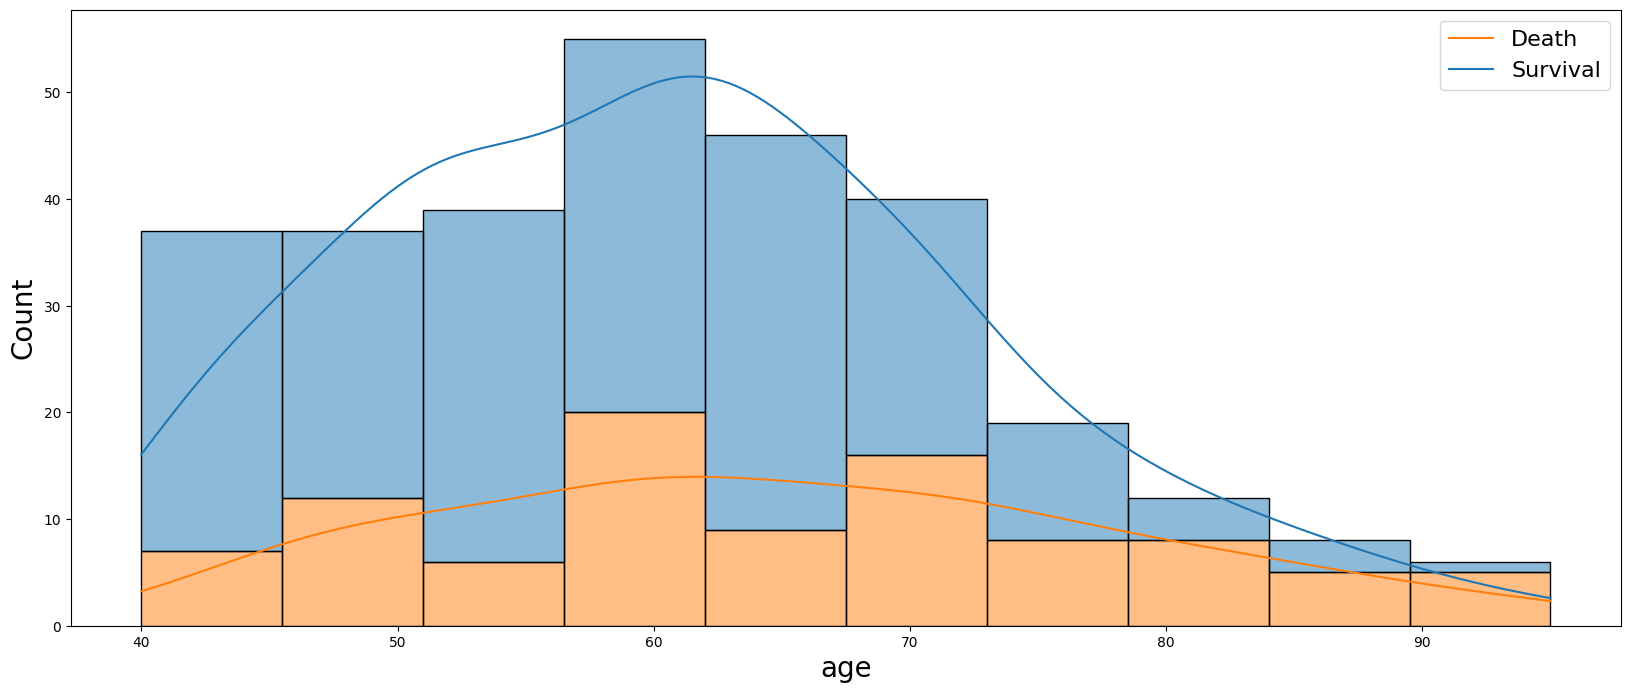

In [104]:
# Analysis of Age and death event
fig, ax = subplts()

plot_hist_hue("age", "death", ax)
ax.set_ylabel("Count", fontsize=20)  
ax.set_xlabel("age", fontsize=20)  
ax.legend(["Death", "Survival"], loc="upper right", fontsize=16)

plt.show()

#### ejection_fraction & death event

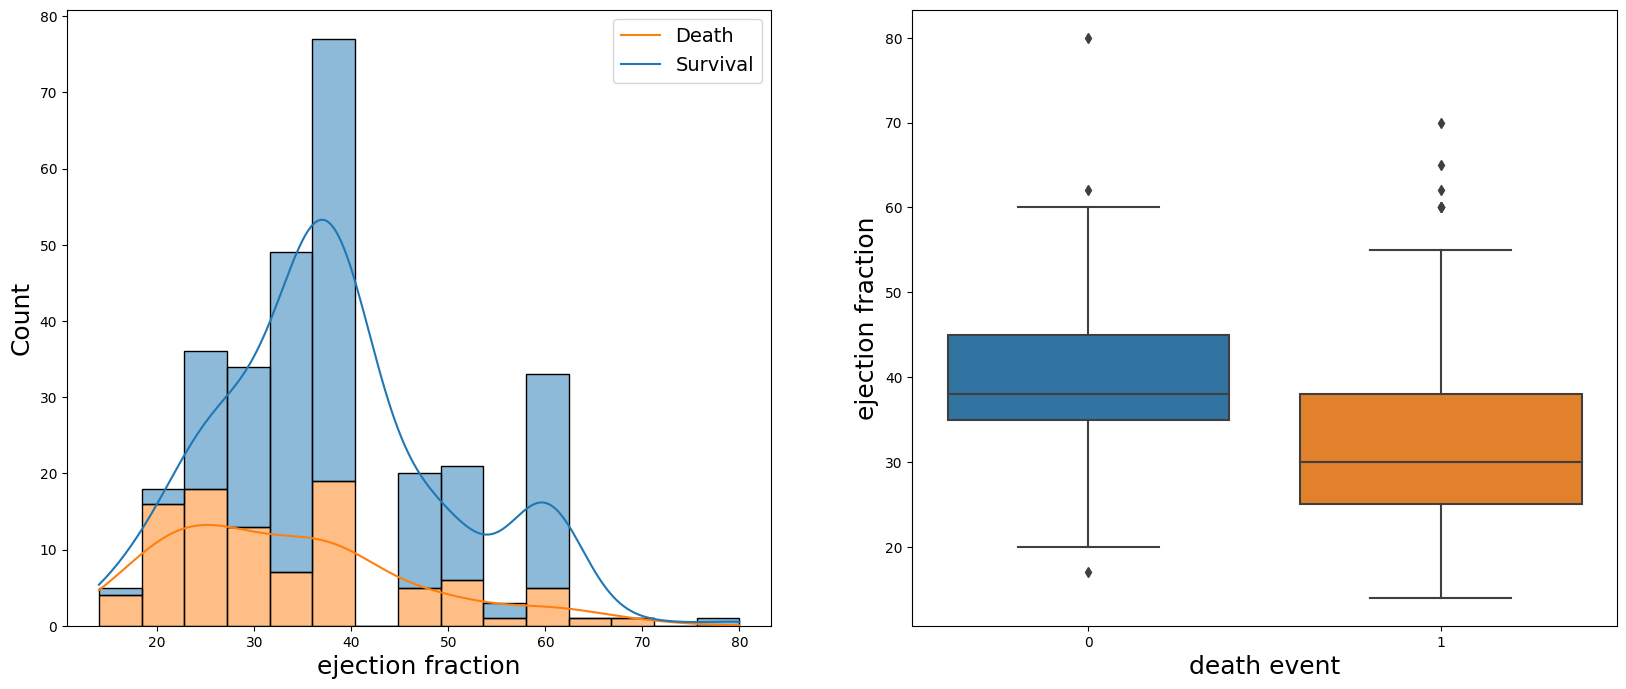

In [105]:
fig, ax = subplts(1, 2)

plot_hist_hue("ejf", "death", ax[0])
ax[0].set_ylabel("Count", fontsize=18)  
ax[0].set_xlabel("ejection fraction", fontsize=18)  
ax[0].legend(["Death", "Survival"], loc="upper right", fontsize=14)

plot_boxcat("death", "ejf", ax[1])
ax[1].set_ylabel("ejection fraction", fontsize=18)  
ax[1].set_xlabel("death event", fontsize=18)

plt.show()

**Plot violin plot for time based on data event**

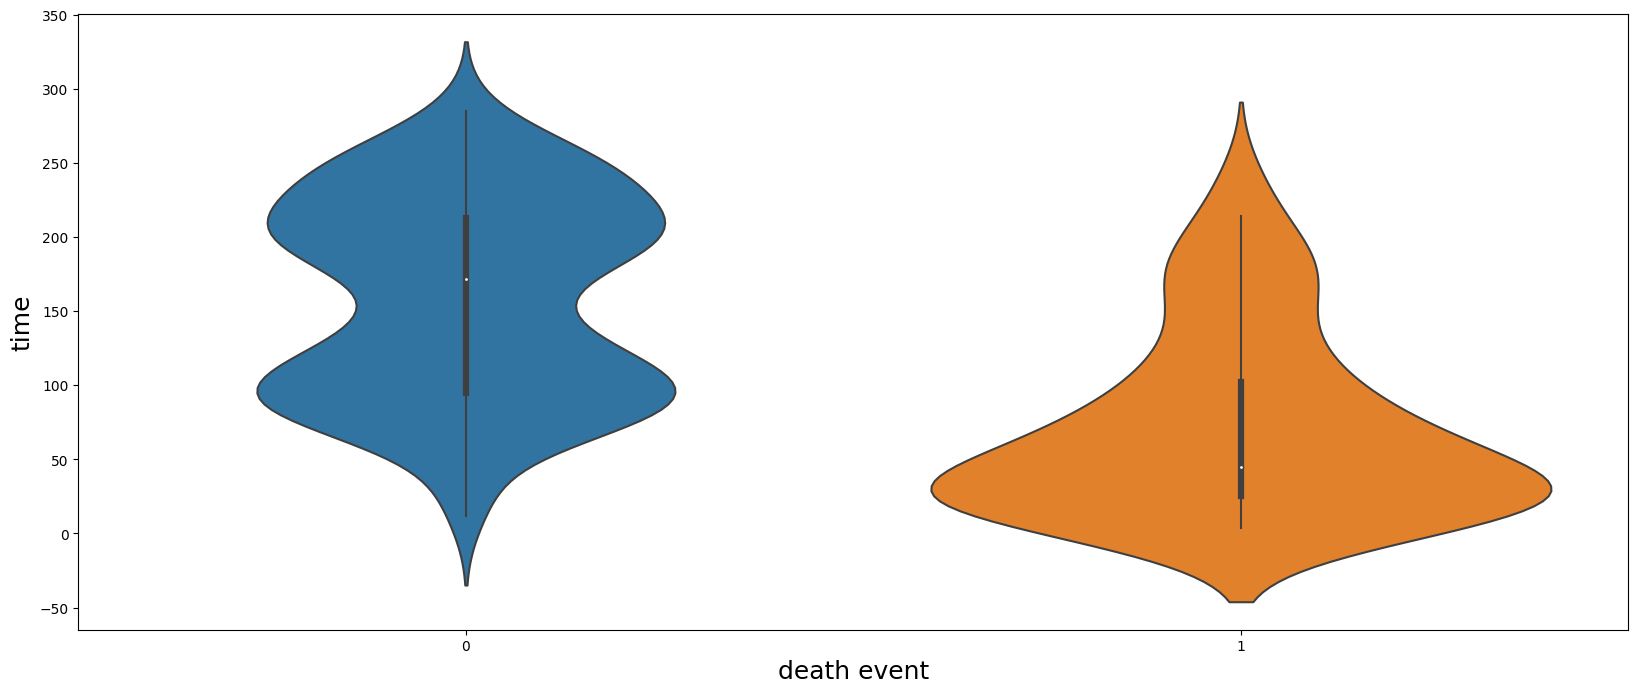

In [106]:
fig,ax=subplts()
sns.violinplot(data=dt, x="death", y="time")
ax.set_ylabel("time", fontsize=18)  
ax.set_xlabel("death event", fontsize=18)  

plt.show()

## Analysing Correlations

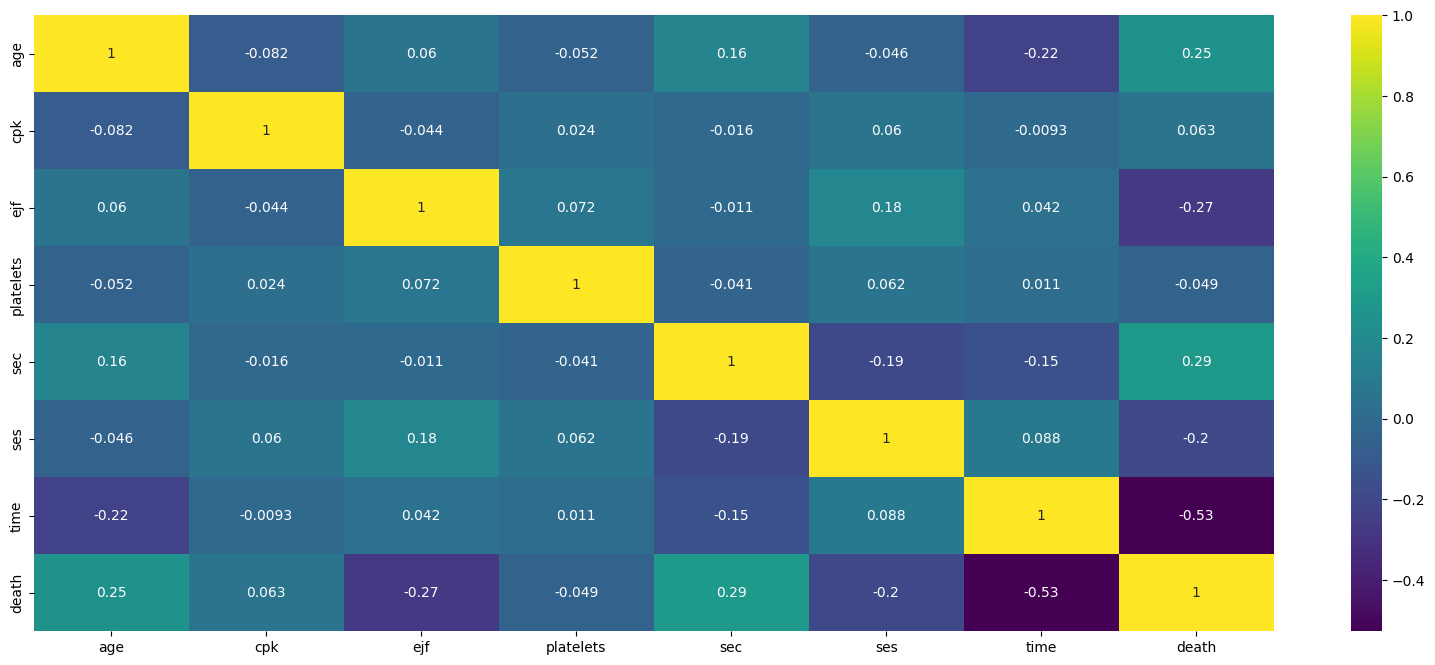

In [107]:
# Analysing Correlations
def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)
corr = dt.corr()
fig, ax = subplts()

dataplot = sns.heatmap(data=corr, annot=True, ax=ax, cmap="viridis")
plt.show()

# 5. Train-Test Set Split

## Train Test Split

In [108]:
## encoding categorical variables
dt['sex'] = dt['sex'].replace('man', 1)
dt['sex'] = dt['sex'].replace('woman', 0)
dt = pd.get_dummies(dt, drop_first=True)
dt.rename(columns={'anaemia_true' : 'anaemia' ,'diabetes_true':'diabetes','hbp_true':'hbp','high_blood_pressure':'hbp','smoking_true':'smoking'}  , inplace=True)
dt.head()

,age,cpk,ejf,platelets,sec,ses,sex,time,death,anaemia,diabetes,hbp,smoking
0,75.0,582,20,265000.00,1.9,130,1,4,1,0,0,1,0
1,55.0,7861,38,263358.03,1.1,136,1,6,1,0,0,0,0
2,65.0,146,20,162000.00,1.3,129,1,7,1,0,0,0,1
3,50.0,111,20,210000.00,1.9,137,1,7,1,1,0,0,0
4,65.0,160,20,327000.00,2.7,116,0,8,1,1,1,0,0


In [109]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['death'],axis=1)
y = dt['death']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [111]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(239, 12)
(239,)
------------Test Set------------------
(60, 12)
(60,)


## Feature Normalization

**In this step we will normalize all the numeric feature in the range of 0 to 1**

In [112]:
scaler = MinMaxScaler()
X_train[['age','cpk','ejf','platelets','sec','ses','time']] = scaler.fit_transform(X_train[['age','cpk','ejf','platelets','sec','ses','time']])
X_train.head()

,age,cpk,ejf,platelets,sec,ses,sex,time,anaemia,diabetes,hbp,smoking
94,0.327273,0.014558,0.363636,0.345432,0.022472,0.866667,0,0.281139,0,1,1,0
164,0.090909,0.308007,0.242424,0.354193,0.067416,0.766667,1,0.444840,0,1,0,0
297,0.090909,0.304303,0.363636,0.111389,0.101124,0.800000,1,0.982206,0,0,0,1
280,0.545455,0.340314,0.393939,0.237797,0.056180,0.700000,1,0.864769,0,1,0,0
126,0.109091,0.017622,0.045455,0.275344,0.179775,0.266667,0,0.341637,0,1,1,0


In [113]:
X_test[['age','cpk','ejf','platelets','sec','ses','time']] = scaler.fit_transform(X_test[['age','cpk','ejf','platelets','sec','ses','time']])
X_test.head()

,age,cpk,ejf,platelets,sec,ses,sex,time,anaemia,diabetes,hbp,smoking
31,0.811321,0.000000,0.583333,0.699311,0.827586,0.542857,1,0.079545,0,0,0,0
201,0.056604,0.158598,0.895833,0.734809,0.137931,0.657143,1,0.678030,0,1,1,0
184,0.301887,0.067891,0.166667,0.404886,0.206897,0.685714,1,0.617424,1,0,0,1
65,0.339623,0.025042,0.062500,0.196074,0.793103,0.400000,1,0.215909,0,0,0,1
2,0.433962,0.068447,0.062500,0.285863,0.241379,0.457143,1,0.000000,0,0,0,1


# 6. Base Modelling

In [114]:
# get a baseline of models
def base_models():
 bmodels = dict()
 bmodels['rf'] = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
 bmodels['svc'] = svm.SVC(kernel='linear',gamma='auto', probability=True,random_state=42)
 bmodels['bayes']= GaussianNB()
 bmodels['tree']=DecisionTreeClassifier(random_state=42)
 bmodels['knn']=KNeighborsClassifier(9)
 bmodels['xgb']=XGBClassifier(n_estimators= 100,random_state=42)
 return bmodels

In [115]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, error_score='raise')
 return scores

>rf 0.862 (0.069)
>svc 0.826 (0.066)
>bayes 0.745 (0.076)
>tree 0.785 (0.081)
>knn 0.704 (0.067)
>xgb 0.855 (0.071)


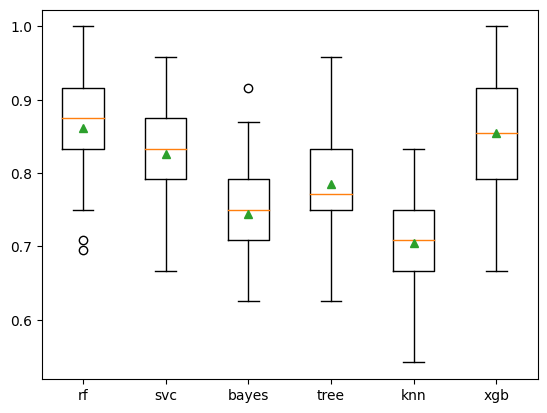

In [116]:
# get the models to evaluate
bmodels = base_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in bmodels.items():
 scores = evaluate_model(model, X_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 7. Ensemble model

In [117]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level1 = list()
 level1.append(('rf',RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)))
 level1.append(('svc', svm.SVC(kernel='linear',gamma='auto',probability=True,random_state=42)))
 level1.append(('xgb', XGBClassifier(n_estimators= 100,random_state=42)))
 # define meta learner model
 level2 = LogisticRegression()
 # define the stacking ensemble
 mode2 = StackingClassifier(estimators=level1, final_estimator=level2)
 return mode2

In [118]:
model =get_stacking()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.81666667]


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Stacked Classifier,0.816667,0.642857,0.947368,0.756098,0.765957,0.851733


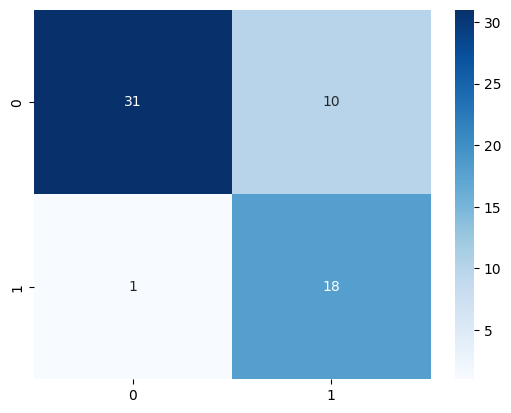

In [119]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True,cmap='Blues')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

# 8. Model Evaluation 

In [120]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42).fit(X_train, y_train)
y_pred_rfe=rf.predict(X_test)

svc=svm.SVC(kernel='linear',gamma='auto',probability=True,random_state=42).fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

xgb=XGBClassifier(n_estimators= 100,random_state=42).fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)


In [121]:
data = {'Random Forest': y_pred_rfe,
                  'SVC': y_pred_svc, 
          'XGBoost':y_pred_xgb}

models = pd.DataFrame(data) 

for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    results=pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Stacked Classifier,0.816667,0.642857,0.947368,0.756098,0.765957,0.851733
1,Random Forest,0.766667,0.580645,0.947368,0.682927,0.720000,0.815148
2,SVC,0.783333,0.636364,0.736842,0.804878,0.682927,0.770860
3,XGBoost,0.750000,0.562500,0.947368,0.658537,0.705882,0.802953


**ROC AUC Curve**

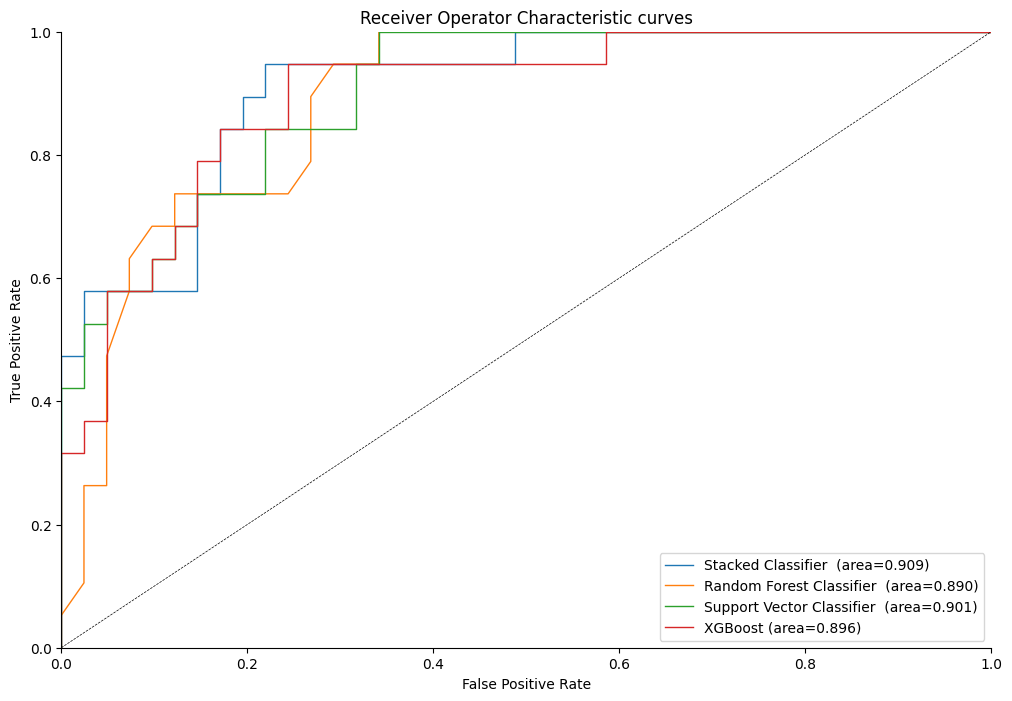

In [122]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(X_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,svc.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()